<a href="https://colab.research.google.com/github/ddarshana04/Machine-Learning/blob/main/LSTM/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
dataframe = pd.read_csv('air.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

97 48


In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
95/95 - 2s - loss: 0.0303 - 2s/epoch - 21ms/step
Epoch 2/100
95/95 - 0s - loss: 0.0130 - 149ms/epoch - 2ms/step
Epoch 3/100
95/95 - 0s - loss: 0.0106 - 152ms/epoch - 2ms/step
Epoch 4/100
95/95 - 0s - loss: 0.0096 - 145ms/epoch - 2ms/step
Epoch 5/100
95/95 - 0s - loss: 0.0087 - 140ms/epoch - 1ms/step
Epoch 6/100
95/95 - 0s - loss: 0.0077 - 142ms/epoch - 1ms/step
Epoch 7/100
95/95 - 0s - loss: 0.0069 - 135ms/epoch - 1ms/step
Epoch 8/100
95/95 - 0s - loss: 0.0060 - 159ms/epoch - 2ms/step
Epoch 9/100
95/95 - 0s - loss: 0.0053 - 138ms/epoch - 1ms/step
Epoch 10/100
95/95 - 0s - loss: 0.0045 - 139ms/epoch - 1ms/step
Epoch 11/100
95/95 - 0s - loss: 0.0041 - 136ms/epoch - 1ms/step
Epoch 12/100
95/95 - 0s - loss: 0.0036 - 154ms/epoch - 2ms/step
Epoch 13/100
95/95 - 0s - loss: 0.0031 - 140ms/epoch - 1ms/step
Epoch 14/100
95/95 - 0s - loss: 0.0028 - 143ms/epoch - 2ms/step
Epoch 15/100
95/95 - 0s - loss: 0.0026 - 149ms/epoch - 2ms/step
Epoch 16/100
95/95 - 0s - loss: 0.0025 - 151ms/epoc

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 5ms/step


In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [ ]:
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.12 RMSE
Test Score: 47.70 RMSE


In [ ]:

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict



In [ ]:

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

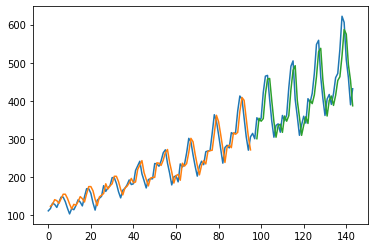

In [ ]:

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()